In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline
pd.option_context('mode.use_inf_as_na', True)


In [2]:
file_path = 'dd/resultats/task_1_8/graph.txt'
df = pd.read_csv(file_path, delim_whitespace=True, header=0)
list_2 = df['RHO_TOT'].values.tolist()
list_1 = df['TAU'].values.tolist()
array = np.column_stack([list_1, list_2])


In [8]:
def find_elbow(data, theta):

    # make rotation matrix
    co = np.cos(theta)
    si = np.sin(theta)
    rotation_matrix = np.array(((co, -si), (si, co)))

    # rotate data vector
    rotated_vector = data.dot(rotation_matrix)

    # return index of elbow
    return np.where(rotated_vector == rotated_vector[:, 1].min())[0][0]
    
def get_data_radiant(data):
  return np.arctan2(data[:, 1].max() - data[:, 1].min(), 
                    data[:, 0].max() - data[:, 0].min())


In [9]:
theta = get_data_radiant(array)
elbow_index = find_elbow(array, theta)
tau_crit, rho_crit = (array[elbow_index,0], array[elbow_index,1])




Text(65, 10000000000.0, '\\(\\tau_{crit} =\\) 73.5')

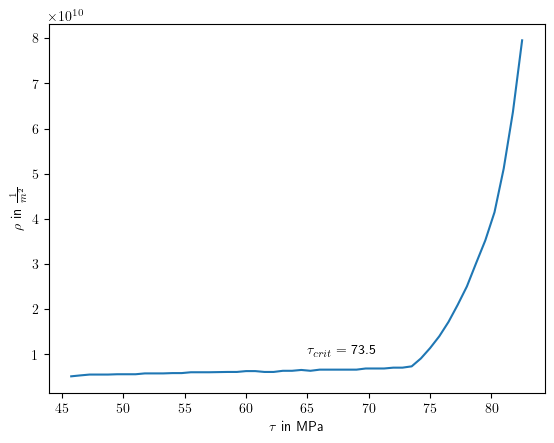

In [35]:
plt.rcParams['text.usetex'] = True #to render LaTeX output
fig, ax = plt.subplots()
ax.plot(df['TAU'][1:], df['RHO_TOT'][1:], )
ax.set_xlabel(r"$\tau$ in MPa")
ax.set_ylabel(r"$\rho$ in $\frac{1}{m^2}$ ")

ax.text(65, 1e10, "\\(\\tau_{crit} =\\) {t_crit}".format(crit='{crit}', t_crit=tau_crit)) #hack to escape key {crit} not found error

fig.savefig('